In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('cleaned_data.csv')

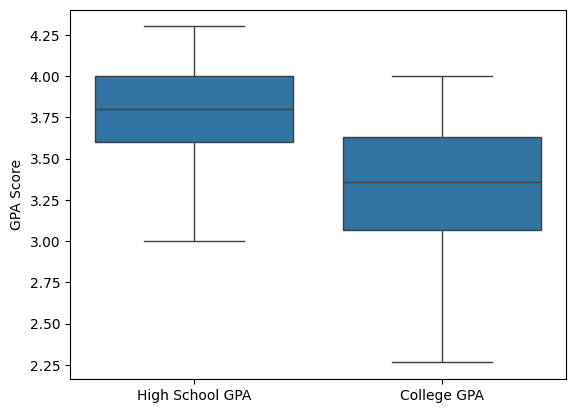

In [3]:
gpa_high = 'Average Undergraduate Applicant High School GPA'

gpa_college = 'Total Cum GPA'
gpa_columns = [f'Semester {i} Cum GPA' for i in range(1, 9)]
data['Total Cum GPA'] = data[gpa_columns].apply(lambda row: row[row.notna()].mean(), axis=1)

df = pd.DataFrame({'High School GPA': data[gpa_high], 'College GPA': data[gpa_college]})
sns.boxplot(x="variable", y="value", data=pd.melt(df),showfliers=False)#Dropped outliners
plt.xlabel('')
plt.ylabel('GPA Score')
plt.show()

<ipython-input-7-f7e2b8dba45f>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(['Sem 1', 'Sem 2', 'Sem 3', 'Sem 4', 'Sem 5', 'Sem 6', 'Sem 7', 'Sem 8', 'Total GPA'])


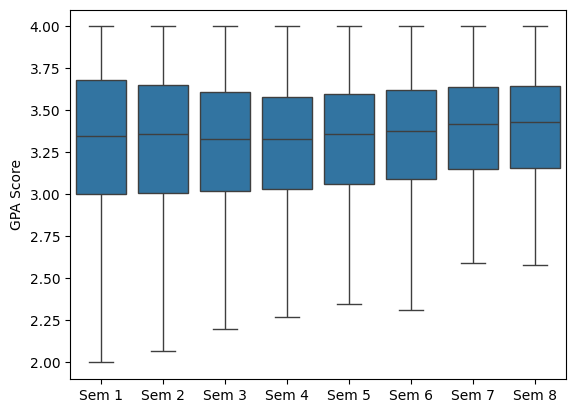

Lower Bound for each semester:variable
Semester 1 Cum GPA    3.0000
Semester 2 Cum GPA    3.0100
Semester 3 Cum GPA    3.0200
Semester 4 Cum GPA    3.0300
Semester 5 Cum GPA    3.0600
Semester 6 Cum GPA    3.0900
Semester 7 Cum GPA    3.1525
Semester 8 Cum GPA    3.1600
Name: value, dtype: float64
Lowest for each semester:variable
Semester 1 Cum GPA    1.10
Semester 2 Cum GPA    1.57
Semester 3 Cum GPA    1.86
Semester 4 Cum GPA    2.16
Semester 5 Cum GPA    2.35
Semester 6 Cum GPA    2.31
Semester 7 Cum GPA    2.30
Semester 8 Cum GPA    2.29
Name: value, dtype: float64


In [7]:
df = pd.DataFrame(data[gpa_columns])
melt_df = pd.melt(df)
lower_bounds = melt_df.groupby('variable')['value'].quantile(0.25)
lowest = melt_df.groupby('variable')['value'].min()
plot = sns.boxplot(x="variable", y="value", data=melt_df,showfliers=False)#Dropped outliners
plot.set_xticklabels(['Sem 1', 'Sem 2', 'Sem 3', 'Sem 4', 'Sem 5', 'Sem 6', 'Sem 7', 'Sem 8', 'Total GPA'])
plt.xlabel('')
plt.ylabel('GPA Score')
plt.show()

print(f'Lower Bound for each semester:{lower_bounds}')
print(f'Lowest for each semester:{lowest}')

# New Section